In [1]:
%%time
import numpy as np  #utilizada para tratar vetores e matrizes
import tensorflow as tf
import keras  #utilizada para criar os modelos de deep learning

print('Bibliotecas parte 1')

Bibliotecas parte 1
CPU times: user 1.16 s, sys: 149 ms, total: 1.31 s
Wall time: 1.32 s


In [2]:
%%time
#from keras import backend as k #utiliza
from tensorflow.keras.models import Sequential #utilizada para criar o modelo sequencial
from tensorflow.keras.layers import Activation #utilizada para obter a funcao de ativação
from tensorflow.keras.layers import Dense,Flatten,Conv2D #utilizada para importar as camadas Dense e Flatten
from tensorflow.keras.optimizers import Adam # utilizada para importar o otimizador do tipo Adam
from tensorflow.keras.metrics import categorical_crossentropy #utilizada para avaliar o modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator #utilizada no pre-processamento das imagens
from tensorflow.keras.layers import BatchNormalization #utilizada para normalizar as "bateladas" no processo de treinamento
from tensorflow.keras.layers import * #importa todos os tipos de camadas

print('Bibliotecas parte 2')

Bibliotecas parte 2
CPU times: user 157 µs, sys: 29 µs, total: 186 µs
Wall time: 157 µs


In [3]:

%%time
from matplotlib import pyplot as plt #utilizada para realizar o plot dos gráficos
from sklearn.metrics import confusion_matrix #utilizada para criar a matriz de confusão
import itertools #utilizada para criar os iterators (para os loops)
import matplotlib.image as mpimg  #utilizada para realizar o plot das imagens
from mlxtend.plotting import plot_confusion_matrix  #utilizar para plotar a matriz de confusão 

print('Bibliotecas parte 2')

Bibliotecas parte 2
CPU times: user 274 ms, sys: 22.6 ms, total: 296 ms
Wall time: 298 ms


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#caminhos para cada um dos conjuntos de imagens a serem utilizadas
caminho_treinamento='/content/drive/My Drive/Colab Notebooks/BD_treinamento'  #dividido em 2 pastas (sadias e contaminadas) - 60/60
caminho_validacao='/content/drive/My Drive/Colab Notebooks/BD_validacao' #dividido em 2 pastas (sadias e contaminadas) - 20/20
caminho_teste='/content/drive/My Drive/Colab Notebooks/BD_teste' #dividido em 2 pastas (sadias e contaminadas) - 25/25

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #utilizada no pre-processamento das imagens

#---------------------------------------------------
# Conhecendo e Preparando o BD
#----------------------------------------------------

#cria a batelada utilizando dados que estão no disco 
# ImageDataGenerator - utilizada para adicionar as imagens e converter em um formato padrão (224x224)
batelada_treino=ImageDataGenerator().flow_from_directory(caminho_treinamento,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)
batelada_validacao=ImageDataGenerator().flow_from_directory(caminho_validacao,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=5)
batelada_teste=ImageDataGenerator().flow_from_directory(caminho_teste,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)

Found 130 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


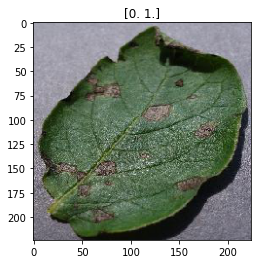

In [8]:
#utilizado para interar sobre a batelada de dados 
img,labels = next(batelada_treino)

#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(img[0].astype(np.uint8)) # seleciona a imagem da posição [0]
plt.title("{}".format(labels[0]))
plt.show()  # mostra a imagem

In [9]:
from tensorflow.keras.models import Sequential #utilizada para criar o modelo sequencial

#---------------------------------------------------
# Criando o primeiro modelo de classificação
#----------------------------------------------------

#criando o modelo de rede convolucionária
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))# 32= número de neurônios na camada/ (3,3)= filtro utilizado para percorrer 
#a imagem / (224,224,3)= tamanho das imagens comprimento 224x largura 224 e RGB=3
model.add(Flatten()) #utilizada para criar um vetor para a entrada de dados na camada de saída
model.add(Dense(2,activation='softmax'))# camada de saída da rede 2 neurônios. 10= sadia /01= contaminada

In [10]:
from tensorflow.keras.models import Sequential #utilizada para criar o modelo sequencial

#mostrando a configuração da rede CNN criada
model.summary()


#definindo o otimizador e a função perda
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [11]:
#treinamento do modelo

history=model.fit_generator(batelada_treino,steps_per_epoch=12,validation_data=batelada_validacao,validation_steps=4,epochs=10,verbose=2)

#deve ser utilizada, pois estamos realizando o treinamento via batelada
#steps_per_epoch = define a quantidade de epocas utilizadas para treinamento, baseando-se no numero de dados utilizados
#vamos utilizar 120 imagens para treinamento (60 sadias e 60 contaminadas), como a batelada é de 10, temos 120/10 = 12 vezes
# validation_data = utilizado para gerar a validação (compara o desempenho do treinamento com o valor real): a cada epoca de treinamento,
#compara o resultado obtido com a previsão realizada nas
#imagens de validação
#verbose=2 - indica o que desejamos exibir na saída do treinamento

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 - 1s - loss: 763.9893 - accuracy: 0.5000 - val_loss: 384.1050 - val_accuracy: 0.5500
Epoch 2/10
12/12 - 0s - loss: 240.6245 - accuracy: 0.5333 - val_loss: 214.9231 - val_accuracy: 0.4500
Epoch 3/10
12/12 - 0s - loss: 189.8926 - accuracy: 0.6500 - val_loss: 69.7830 - val_accuracy: 0.7000
Epoch 4/10
12/12 - 0s - loss: 93.4081 - accuracy: 0.7500 - val_loss: 141.0810 - val_accuracy: 0.7000
Epoch 5/10
12/12 - 0s - loss: 61.6987 - accuracy: 0.8083 - val_loss: 76.6792 - val_accuracy: 0.7000
Epoch 6/10
12/12 - 0s - loss: 38.5908 - accuracy: 0.8500 - val_loss: 156.4774 - val_accuracy: 0.5000
Epoch 7/10
12/12 - 0s - loss: 12.3810 - accuracy: 0.9333 - val_loss: 85.0133 - val_accuracy: 0.5500
Epoch 8/10
12/12 - 0s - loss: 79.4685 - accuracy: 0.7667 - val_loss: 656.1023 - val_accuracy: 0.5500
Epoch 9/10
12/12 - 0s - loss: 200.3459 - accuracy: 0.6000 - val_loss: 176.3546 - val_accuracy: 0.6000
Epoch 10/10
12

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


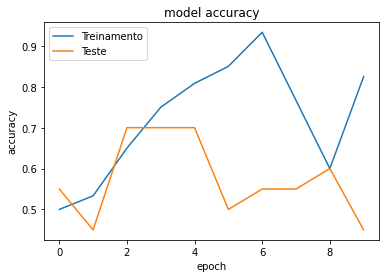

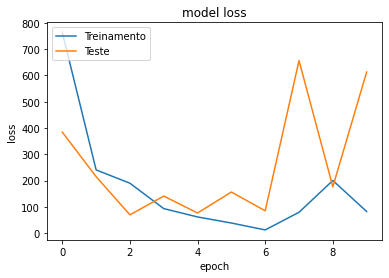

In [12]:
# Lista os dados históricos do treinamento
print(history.history.keys())
# summarize history para a accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

In [13]:
#---------------------------------------------------
# Realiza a previsão do modelo
#----------------------------------------------------

#previsão sobre qual imagem corresponde a cada elemento
teste_img, teste_labels=next(batelada_teste)

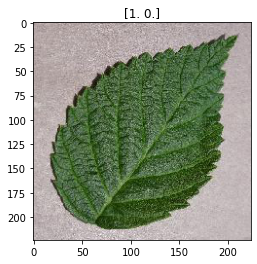

In [14]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(teste_img[0].astype(np.uint8)) 
plt.title("{}".format(teste_labels[0]))
plt.show()  # mostra a imagem

In [15]:
#testar a classificação da imagens 
teste_labels=teste_labels[:,0] # transforma sadias (10) em 1 e contaminadas (01) em apenas 0

In [16]:
#realiza a previsão utilizando os dados de teste
previsao=model.predict_generator(batelada_teste,steps=1,verbose=0)
#como no fit, devemos utilizar o generator, pois estamos utilizando as bateladas de dados 
print(previsao)

Instructions for updating:
Please use Model.predict, which supports generators.
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


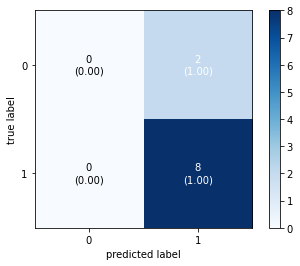

In [17]:
#criando a matriz de confusão para comparar os resultados
matriz_confusao=confusion_matrix(teste_labels,previsao[:,0])
nomes_das_classes=['contaminadas','sadias']
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [43]:
#-----------------------------------------------------------------------------
#  Melhorando a prevesão do modelo - TRANSFER LEARNING
#----------------------------------------------------------------------------


vgg16_model=tf.keras.applications.vgg16.VGG16() # classe já pre-treinada para ser utilizada em nosso classificador

vgg16_model.summary()# vamos ver como o modelo do vgg16 foi construído

print(type(vgg16_model))

print(' ')
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print(' ')

#transformando o tipo model do vgg16 em sequencial
model=Sequential()  #cria um modelo sequencial 
for layer in vgg16_model.layers[:-1]: #extrai cada uma das camadas do vgg16 ->(predictions (Dense)(None, 1000)4097000 )<-
    model.add(layer)            #adiciona no modelo criado até a penultima camada
    
model.summary()
print(type(model))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [44]:
# retirar a ultima camada do modelo, pois só desejamos classificar entre 2 grupos de imagens
#model.layers.pop()

#colocando as camadas intermediárias em modo de "hibernação", porque não quero mais treiná-las
for layer in model.layers:
    layer.trainable=False
#colocar em modo de hibernação, garante que, durante o treinamento, os pesos não serão atualizados
    
#adicionando a ultima camada para a classificação entre 2 grupos de imagens (cachorros ou gatos)    
model.add(Dense(2, activation='softmax'))

#mostra o novo modelo CNN (nosso+vgg16)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [45]:
# importando as camadas hibernadas

import pandas as pd
pd.set_option('max_colwidth',-1)
layers = [(layer,layer.name,layer.trainable) for layer in model.layers]
pd.DataFrame(layers,columns=['Layer Type', 'Layer Name', 'Layer trainable'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,Layer Type,Layer Name,Layer trainable
0,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1bf24bc7f0>,block1_conv1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1bf24bc9e8>,block1_conv2,False
2,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1bf24bcf98>,block1_pool,False
3,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1c5eb608d0>,block2_conv1,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1c5eb3a748>,block2_conv2,False
5,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1c5eb3a7f0>,block2_pool,False
6,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1c5eb56390>,block3_conv1,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1c5eb56f28>,block3_conv2,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1c5eb43630>,block3_conv3,False
9,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1c50209780>,block3_pool,False


In [46]:
%%time 
#----------------------------------------------------------------------------
#  Inicia o treinamento através dos novos pesos
#---------------------------------------------------------------------------

#definindo o otimizador e a função perda
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

#treinamento do modelo
history=model.fit_generator(batelada_treino,steps_per_epoch=12, validation_data=batelada_validacao, validation_steps=4, epochs=10,verbose=2)


#previsão utilizando o modelo+VGG16

#previsão sobre qual imagem corresponde a cada elemento
teste_img, teste_labels=next(batelada_teste)

Epoch 1/10
12/12 - 1s - loss: 1.2842 - accuracy: 0.4083 - val_loss: 1.0129 - val_accuracy: 0.4500
Epoch 2/10
12/12 - 1s - loss: 1.0704 - accuracy: 0.5000 - val_loss: 1.0888 - val_accuracy: 0.5000
Epoch 3/10
12/12 - 1s - loss: 0.7774 - accuracy: 0.5750 - val_loss: 0.7166 - val_accuracy: 0.6500
Epoch 4/10
12/12 - 1s - loss: 0.6388 - accuracy: 0.6583 - val_loss: 0.5718 - val_accuracy: 0.6500
Epoch 5/10
12/12 - 1s - loss: 0.5544 - accuracy: 0.7000 - val_loss: 0.4897 - val_accuracy: 0.7000
Epoch 6/10
12/12 - 1s - loss: 0.4485 - accuracy: 0.7917 - val_loss: 0.4687 - val_accuracy: 0.8000
Epoch 7/10
12/12 - 1s - loss: 0.3973 - accuracy: 0.8250 - val_loss: 0.4494 - val_accuracy: 0.7500
Epoch 8/10
12/12 - 1s - loss: 0.3540 - accuracy: 0.8583 - val_loss: 0.3933 - val_accuracy: 0.8500
Epoch 9/10
12/12 - 1s - loss: 0.3166 - accuracy: 0.8667 - val_loss: 0.4035 - val_accuracy: 0.8000
Epoch 10/10
12/12 - 1s - loss: 0.2774 - accuracy: 0.9250 - val_loss: 0.4864 - val_accuracy: 0.7500
CPU times: user 6.2

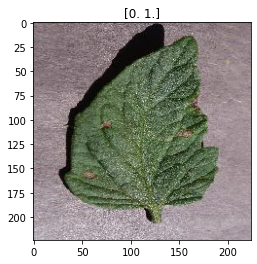

In [47]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(teste_img[4].astype(np.uint8)) #seleciona a imagem da posição 4
plt.title("{}".format(teste_labels[4]))
plt.show()  # mostra a imagem

In [48]:
#testar a classificação da imagens 
teste_labels=teste_labels[:,0] # transforma sadias 10 em 1 e contaminadas 01 em apenas 0

#realiza a previsão utilizando os dados de teste
previsao=model.predict_generator(batelada_teste,steps=1,verbose=0)
#como no fit, devemos utilizar o generator, pois estamos utilizando as bateladas de dados 
print(previsao)

[[0.49495173 0.5050483 ]
 [0.5708737  0.42912632]
 [0.946917   0.05308305]
 [0.81233174 0.18766823]
 [0.88883615 0.11116389]
 [0.8290951  0.17090489]
 [0.91751844 0.08248154]
 [0.4564564  0.5435436 ]
 [0.15603864 0.84396136]
 [0.43606964 0.5639304 ]]


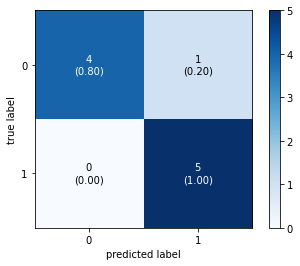

In [49]:
#criando a matriz de confusão para comparar os resultados
matriz_confusao=confusion_matrix(teste_labels,np.round(previsao[:,0])) # a diferença é que a rede gera valores float, então devemos converter
#em valores inteiros (0,1)
nomes_das_classes=['contaminadas','sadias']
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


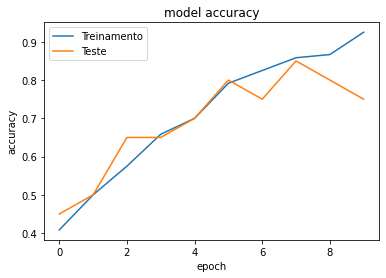

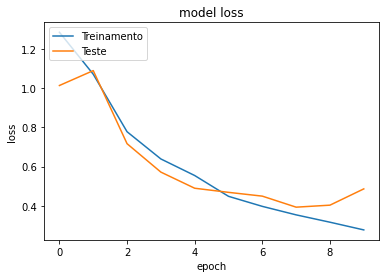

In [50]:
# Lista os dados históricos do treinamento
print(history.history.keys())
# summarize history para a accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()